In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pandas import DataFrame as df

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import ipytest
import pytest

__file__ = "Data_visualization.ipynb"

# Import Data

### JSON Dataset

In [4]:
dataf = df()#pd.read_json("db.json")

### Excel Dataset

In [5]:
df1 = pd.read_excel("../datasets/raw_data.xlsx", sheetname='Sheet1')
data = df1.fillna(method='ffill')

### HTML Dataset

In [6]:
dataf = df()#pd.read_html(‘linktoonlinehtmlfile’)

### XML Dataset

In [7]:
dataf = df() #to be completed

### CSV Dataset

In [8]:
dataf = pd.read_csv("../datasets/disease.csv", sep=' ', delimiter='\t')

### Unit tests

In [24]:
def test_import_data():
    assert os.path.exists("../datasets/disease.csv") == 1
    assert os.path.exists("../datasets/raw_data.xlsx") == 1
    assert pd.read_csv("../datasets/disease.csv", sep=' ', delimiter='\t').size != 0
    assert pd.read_excel("../datasets/raw_data.xlsx", sheetname='Sheet1').size != 0
ipytest.run()

=============================== test session starts ===============================
platform linux -- Python 3.6.7, pytest-4.3.1, py-1.8.0, pluggy-0.9.0
rootdir: /home/tgey/Medicision/IA/Notebooks, inifile:
collected 4 items

Data_visualization.py ....                                                  [100%]

============================ 4 passed in 0.38 seconds =============================


# Data Exploration

## Dataset discover

In [10]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147978 entries, 0 to 147977
Data columns (total 4 columns):
MeSH Symptom Term    147978 non-null object
MeSH Disease Term    147978 non-null object
PubMed occurrence    147978 non-null int64
TFIDF score          147978 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ MB


In [11]:
dataf.columns

Index(['MeSH Symptom Term', 'MeSH Disease Term', 'PubMed occurrence',
       'TFIDF score'],
      dtype='object')

In [12]:
dataf.columns=['Symptoms', 'Diseases', 'occurrence', 'score']
dataf.head(15)

,Symptoms,Diseases,occurrence,score
0,Aging - Premature,Respiratory Syncytial Virus Infections,1,3.464551
1,Aging - Premature,Orthomyxoviridae Infections,1,3.464551
2,Aging - Premature,HIV Infections,3,10.393654
3,Aging - Premature,Acquired Immunodeficiency Syndrome,3,10.393654
4,Aging - Premature,Breast Neoplasms,1,3.464551
5,Aging - Premature,Colonic Neoplasms,1,3.464551
6,Aging - Premature,Mammary Neoplasms - Animal,1,3.464551
7,Aging - Premature,Skin Neoplasms,3,10.393654
8,Aging - Premature,Neoplasms - Experimental,1,3.464551
9,Aging - Premature,Cell Transformation - Neoplastic,3,10.393654


### Missing Values

In [13]:
pd.isnull(dataf).any()

Symptoms      False
Diseases      False
occurrence    False
score         False
dtype: bool

In [14]:
total = dataf.isnull().sum().sort_values(ascending=False)
percent = (dataf.isnull().sum()/dataf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
score,0,0.0
occurrence,0,0.0
Diseases,0,0.0
Symptoms,0,0.0


In [15]:
def test_missing_values():
    assert missing_data['Total'].max() == 0

ipytest.run()

=============================== test session starts ===============================
platform linux -- Python 3.6.7, pytest-4.3.1, py-1.8.0, pluggy-0.9.0
rootdir: /home/tgey/Medicision/IA/Notebooks, inifile:
collected 2 items

Data_visualization.py .F                                                    [100%]

==================================== FAILURES =====================================
________________________________ test_import_data _________________________________

    def test_import_data():
>       assert os.path.exists("disease.csv") == 1
E       AssertionError

<ipython-input-9-4338cfc00efb>:2: AssertionError
======================= 1 failed, 1 passed in 0.10 seconds ========================


In [16]:
dataf.describe()

,occurrence,score
count,147978.000000,147978.000000
mean,11.886753,16.672997
std,228.031517,222.439257
min,1.000000,0.069941
25%,1.000000,1.639269
50%,2.000000,2.817924
75%,4.000000,6.576661
max,50200.000000,41794.193312


In [17]:
nbSymptoms = dataf.groupby("Diseases")[["Symptoms"]].count()
nbSymptoms.sort_values("Symptoms").reset_index()
nbSymptoms.columns=['Number of Symptoms for a disease']
nbSymptoms.head(15)

,Number of Symptoms for a disease
Diseases,
22q11 Deletion Syndrome,4
46 - XX Disorders of Sex Development,1
46 - XY Disorders of Sex Development,1
ACTH Syndrome - Ectopic,12
ACTH-Secreting Pituitary Adenoma,4
AIDS Arteritis - Central Nervous System,3
AIDS Dementia Complex,54
AIDS-Associated Nephropathy,9
AIDS-Related Complex,30


In [18]:
def test_symptoms_agregation():
    assert ('Number of Symptoms for a disease' in nbSymptoms.columns) == True
    assert nbSymptoms.size != 0

In [19]:
nbDiseases = dataf.groupby("Symptoms")[["Diseases"]].count()
nbDiseases.sort_values("Diseases").reset_index()
nbDiseases.columns=['Number of Diseases']
nbDiseases.head(15)

,Number of Diseases
Symptoms,
Abdomen - Acute,1002
Abdominal Pain,1599
Acute Coronary Syndrome,314
Aerophagy,72
Ageusia,117
Aging - Premature,132
Agnosia,303
Agraphia,148
Akathisia - Drug-Induced,188


In [20]:
def test_diseases_agregation():
    assert ('Number of Diseases' in nbDiseases.columns) == True
    assert nbDiseases.size != 0


## Data Visualization

## Feature Correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd634de50b8>,
      dtype=object)

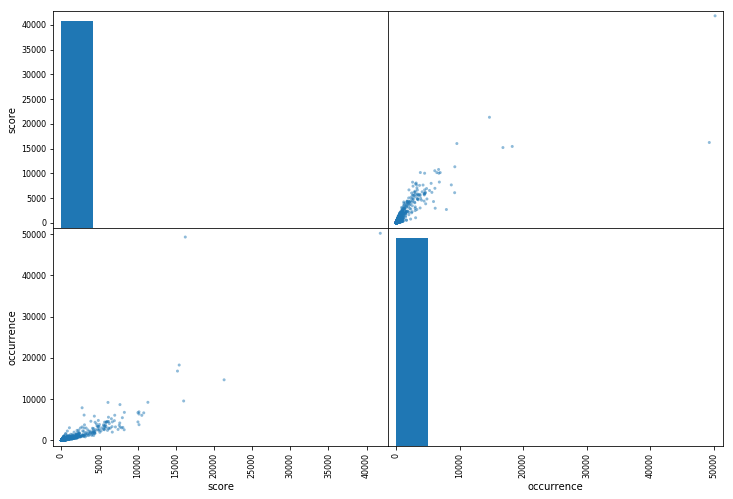

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["score", "occurrence"]
scatter_matrix(dataf[attributes], figsize=(12, 8))

In [22]:
corrmat = dataf.corr()
corrmat['score'].sort_values(ascending=False)

score         1.000000
occurrence    0.855061
Name: score, dtype: float64

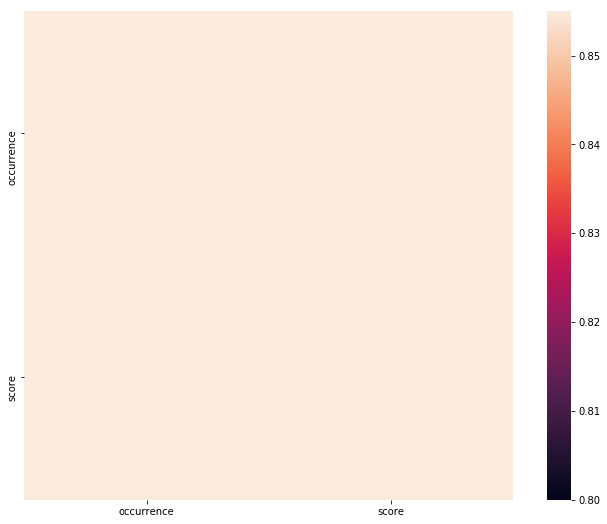

In [23]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);